# PHYS20762 - Project 3 - Monte Carlo Method

Alexander Stansfield <br>
University of Manchester <br>
May 2022

In [1]:
%matplotlib notebook
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams.update({'font.size': 16})
plt.style.use('default')

<IPython.core.display.Javascript object>


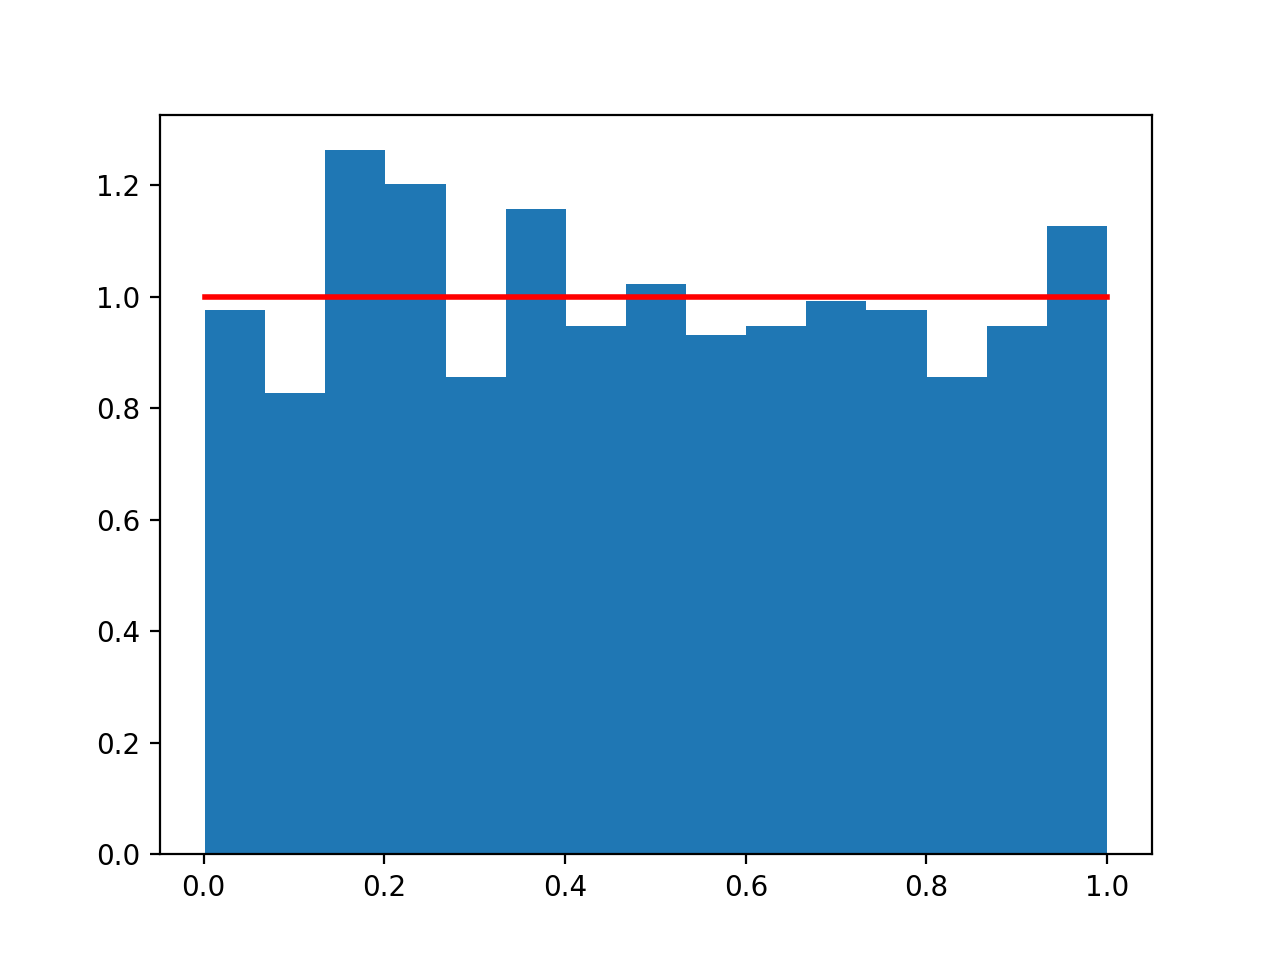

In [2]:
s  = np.random.uniform(0, 1, 1000)
count, bins, ignored = plt.hist(s, 15, density = True)
plt.plot(bins, np.ones_like(bins), linewidth = 2, color = 'red')
plt.show()

<IPython.core.display.Javascript object>


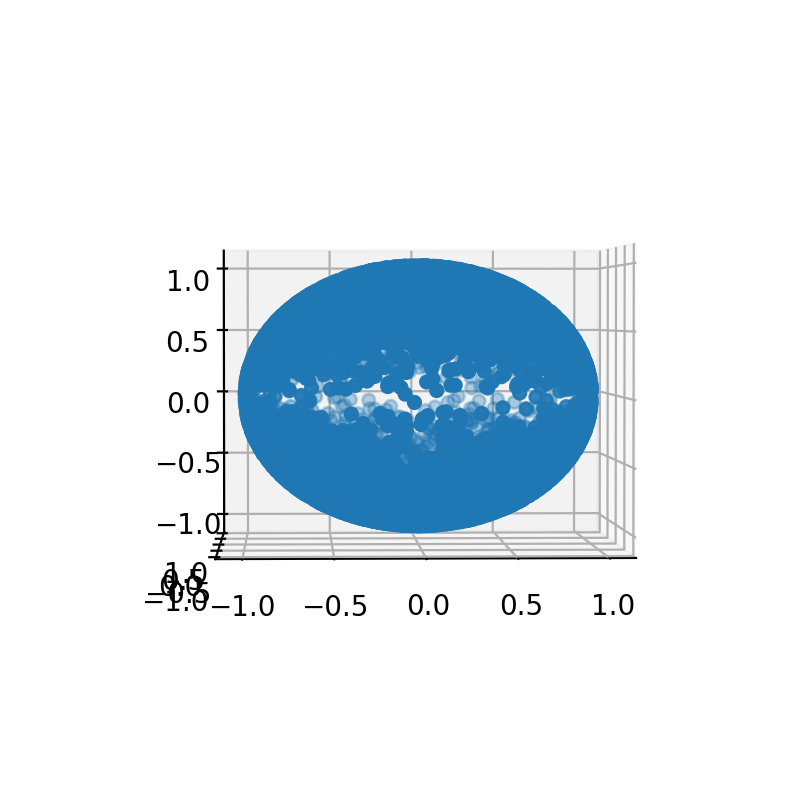

In [6]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')

xdata = np.zeros(0)
ydata = np.zeros(0)
zdata = np.zeros(0)

for j in range(0, 10000):
    x = np.random.uniform(-1, 1, 1)
    y_limit = np.sqrt(1 - x**2)
    y = np.random.uniform(-y_limit, y_limit, 1)
    i = np.random.uniform(0, 1, 1)
    if  i < 0.5:
        z = np.sqrt(1-x**2-y**2)
    else:
        z = -np.sqrt(1-x**2-y**2)
    xdata = np.append(xdata, x)
    ydata = np.append(ydata, y)
    zdata = np.append(zdata, z)

ax.scatter(xdata, ydata, zdata)
plt.show()


<IPython.core.display.Javascript object>


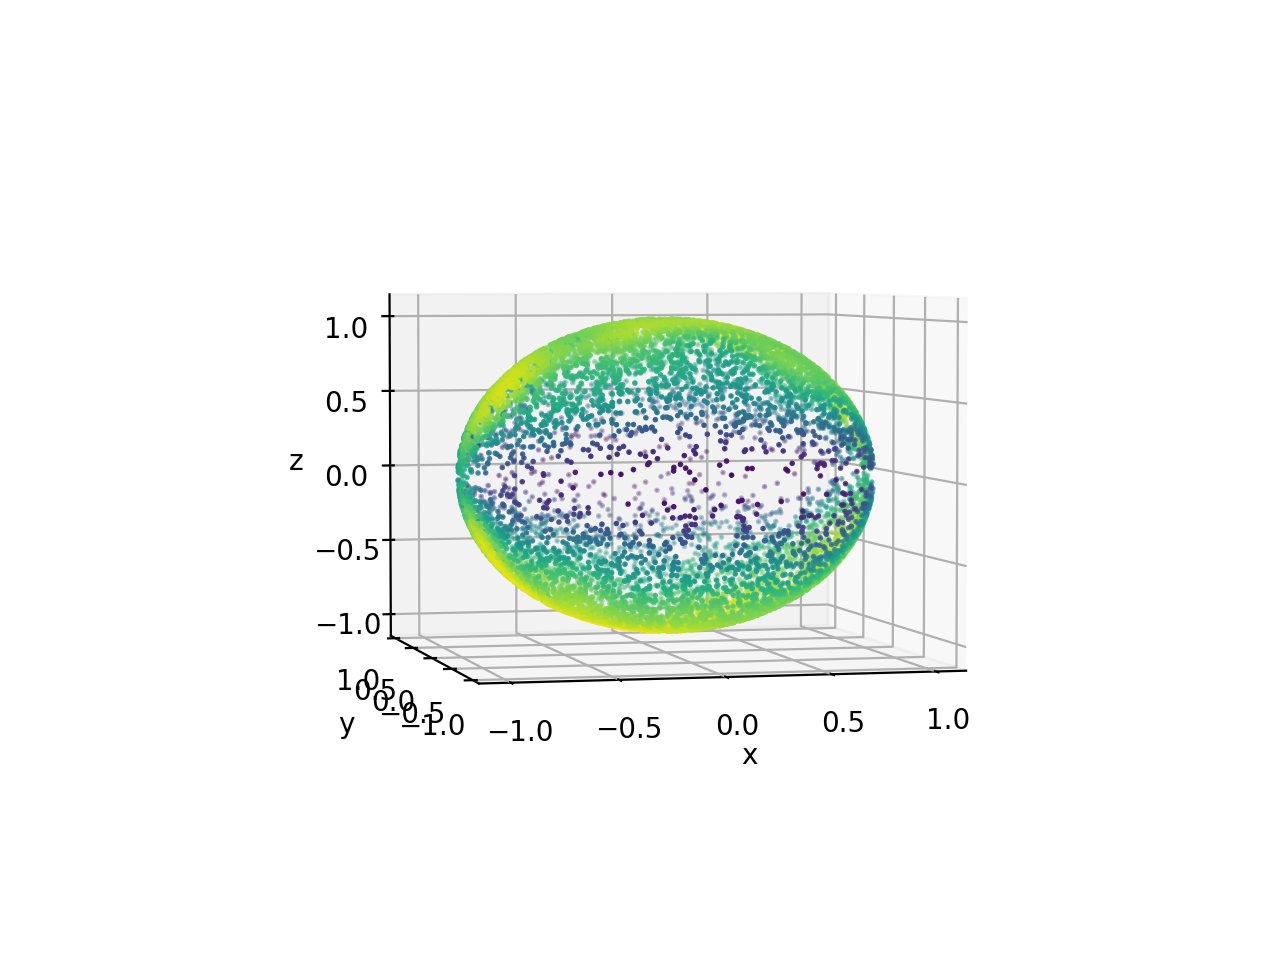

In [7]:
from scipy.stats import gaussian_kde

def normal_heat_map(x_set, y_set, z_set):
    '''
    Function to generate a heat map from a given 3D datset.
    Uses a gaussian fit to determine the density of the
    values.
    
    Parameters
    ----------
    dataset : 2D array of floats
        Entire dataset for a randomly gnerated 3d region
        that follows a normal distribution.
    
    Returns
    -------
    None.
    
    '''
    density = gaussian_kde([x_set, y_set, z_set])([x_set, y_set, z_set])

    idx = density.argsort()
    x_set = x_set[idx]
    y_set = y_set[idx]
    z_set = z_set[idx]
    density = density[idx]

    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.scatter(x_set, y_set, z_set, c=density, s=1)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    plt.show()

normal_heat_map(xdata, ydata, zdata)